<a href="https://colab.research.google.com/github/jantic/DeOldify/blob/master/VideoColorizerColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **<font color='blue'> Video Colorizer </font>**


#◢ DeOldify - Colorize your own videos!

_FYI: This notebook is intended as a tool to colorize gifs and short videos, if you are trying to convert longer video you may hit the limit on processing space. Running the Jupyter notebook on your own machine is recommended (and faster) for larger video sizes._


---

#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:

- Runtime Type = Python 3
- Hardware Accelerator = GPU


#◢ Setup


In [1]:
# NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId

# choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print("GPU not available.")

from os import path

In [3]:
# %pip install -r requirements-colab.txt

In [2]:
import fastai
from deoldify.visualize import *
from pathlib import Path

torch.backends.cudnn.benchmark = True
import warnings

warnings.filterwarnings(
    "ignore", category=UserWarning, message=".*?Your .*? set is empty.*?"
)

Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


/home/eyepatch/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/eyepatch/anaconda3/envs/deoldify/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_hip.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [4]:
# !mkdir 'models'
# !wget https://data.deepai.org/deoldify/ColorizeVideo_gen.pth -O ./models/ColorizeVideo_gen.pth

In [4]:
colorizer = get_video_colorizer()

/home/eyepatch/anaconda3/envs/deoldify/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/eyepatch/anaconda3/envs/deoldify/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /home/eyepatch/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:36<00:00, 4.91MB/s] 


#◢ Instructions


### source_url

Type in a url hosting a video from YouTube, Imgur, Twitter, Reddit, Vimeo, etc. Many sources work! GIFs also work. Full list here: https://ytdl-org.github.io/youtube-dl/supportedsites.html NOTE: If you want to use your own video, upload it first to a site like YouTube.

### render_factor

The default value of 21 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the video is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality film in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality videos and inconsistencies (flashy render) will generally be reduced, but the colors may get slightly washed out.

### watermarked

Selected by default, this places a watermark icon of a palette at the bottom left corner of the image. This is intended to be a standard way to convey to others viewing the image that it is colorized by AI. We want to help promote this as a standard, especially as the technology continues to improve and the distinction between real and fake becomes harder to discern. This palette watermark practice was initiated and lead by the company MyHeritage in the MyHeritage In Color feature (which uses a newer version of DeOldify than what you're using here).

### How to Download a Copy

Simply right click on the displayed video and click "Save video as..."!

## Helpful debugging tips

1. If a video takes a long time to render and you're wondering how well the frames will actually be colorized, you can preview how well the frames will be rendered at each render_factor by using the code at the bottom. Just stop the video rendering by hitting the stop button on the cell, then run that bottom cell under "See how well render_factor values perform on a frame here". It's not perfect and you may still need to experiment a bit especially when it comes to figuring out how to reduce frame inconsistency. But it'll go a long way in narrowing down what actually works.
2. If videos are taking way too much time for your liking, running the Jupyter notebook VideoColorizer.ipynb on your own machine (with DeOldify installed) will generally be much faster (as long as you have the hardware for it).
3. Longer videos (running multiple minutes) are going to have a rough time on Colabs. You'll be much better off using a local install of DeOldify instead in this case.

## Troubleshooting

The video player may wind up not showing up, in which case- make sure to wait for the Jupyter cell to complete processing first (the play button will stop spinning). Then follow these alternative download instructions

1. In the menu to the left, click Files
2. If you don't see the 'DeOldify' folder, click "Refresh"
3. By default, rendered video will be in /DeOldify/video/result/

If a video you downloaded doesn't play, it's probably because the cell didn't complete processing and the video is in a half-finished state.


#◢ Colorize!!


In [6]:
source_url = "https://www.youtube.com/watch?v=Ydiz1Hzfx5s"  # @param {type:"string"}
render_factor = 21  # @param {type: "slider", min: 5, max: 40}
watermarked = True  # @param {type:"boolean"}

try:
    if source_url is not None and source_url != "":
        video_path = colorizer.colorize_from_url(
            source_url, "video.mp4", render_factor, watermarked=watermarked
        )
        show_video_in_notebook(video_path)
    else:
        print("Provide a video url and try again.")
except ffmpeg.Error as e:
    print("stderr:", e.stderr)

[youtube] Extracting URL: https://www.youtube.com/watch?v=Ydiz1Hzfx5s
[youtube] Ydiz1Hzfx5s: Downloading webpage
[youtube] Ydiz1Hzfx5s: Downloading ios player API JSON
[youtube] Ydiz1Hzfx5s: Downloading android player API JSON
[youtube] Ydiz1Hzfx5s: Downloading m3u8 information
[info] Ydiz1Hzfx5s: Downloading 1 format(s): 606+140
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 12
[download] Destination: video/source/video.f606.mp4
[download] 100% of    4.02MiB in 00:00:00 at 4.31MiB/s                   
[download] Destination: video/source/video.f140.m4a
[download] 100% of  982.78KiB in 00:00:00 at 2.44MiB/s     
[Merger] Merging formats into "video/source/video.mp4"
Deleting original file video/source/video.f140.m4a (pass -k to keep)
Deleting original file video/source/video.f606.mp4 (pass -k to keep)


COLORIZED PATH ::  video/result/video_no_audio.mp4
MP3 FILE PATH ::  video/source/video.mp4
stderr: None


ffmpeg version 6.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.3.0 (conda-forge gcc 12.3.0-3)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1701352980146/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1701352980146/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1701352980146/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1701352980146/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1701352980146/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-libdav

## See how well render_factor values perform on a frame here


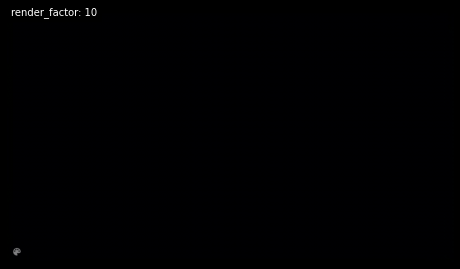

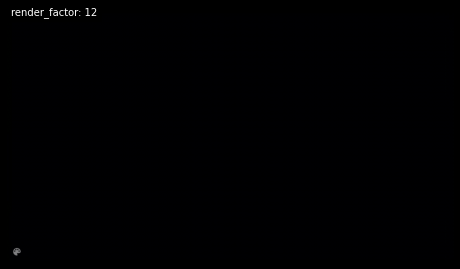

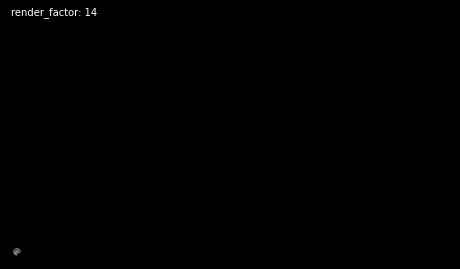

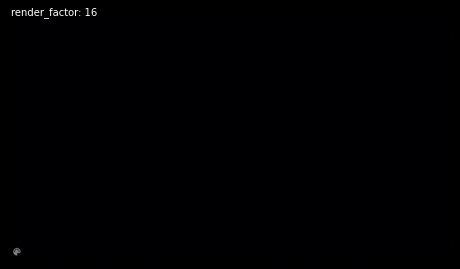

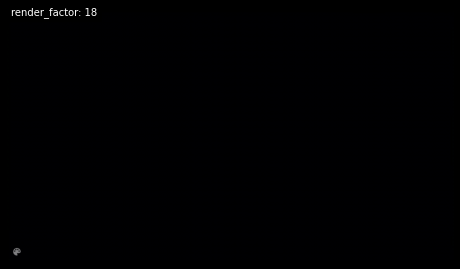

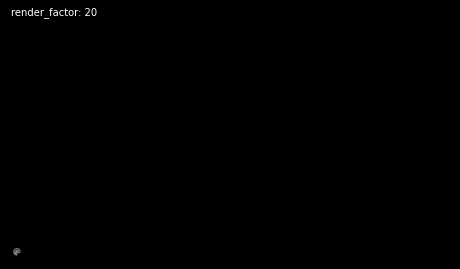

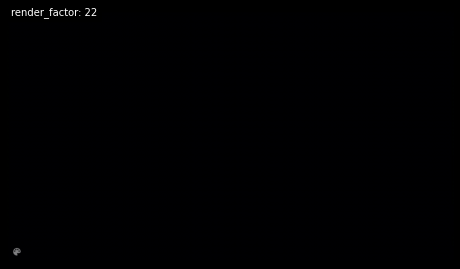

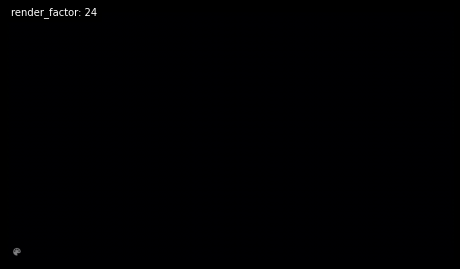

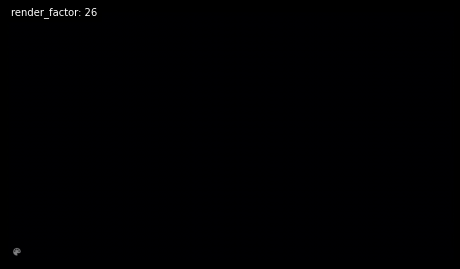

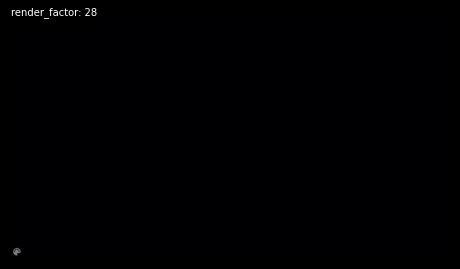

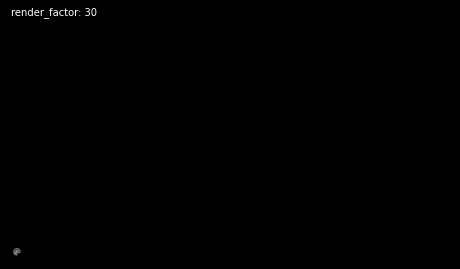

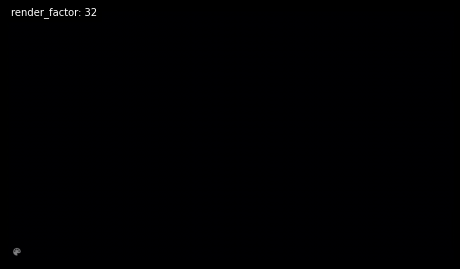

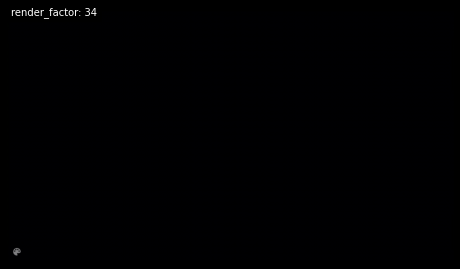

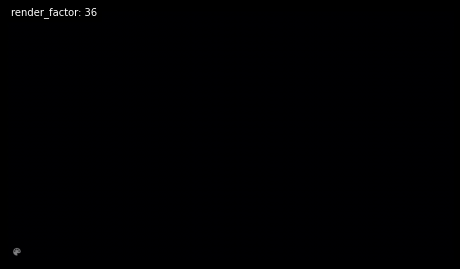

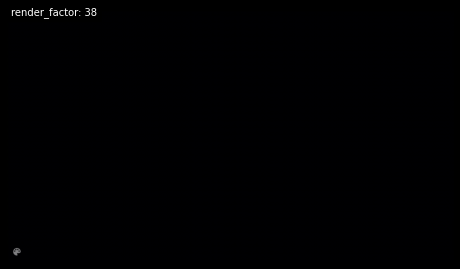

In [9]:
for i in range(10, 40, 2):
    colorizer.vis.plot_transformed_image(
        "video/bwframes/video/00001.jpg",
        render_factor=i,
        display_render_factor=True,
        figsize=(8, 8),
    )

---

#⚙ Recommended video and gif sources

- [/r/Nickelodeons/](https://www.reddit.com/r/Nickelodeons/)
- [r/silentmoviegifs](https://www.reddit.com/r/silentmoviegifs/)
- https://twitter.com/silentmoviegifs
